Urutan proses yang dilakukan:
- Cek informasi kolom
- Drop kolom yang tidak diperlukan
- Plot distribusi dan binning tiap fitur
- Crosstab antar fitur
- Cek outlier by Z-Score dan IQR
- Feature Interaction

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import numpy as np

In [196]:
df = pd.read_csv("data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [198]:
# hapus kolom CustomerID yang tidak diperlukan
df = df.drop('CustomerID',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


terlihat, data sudah bersih dari missing value, dan tipe data sudah sesuai dan relevan

Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64


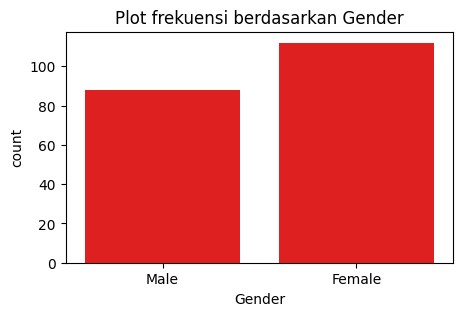

In [199]:
plt.figure(figsize=(5,3))
sns.countplot(data = df,x='Gender',color = 'red')
plt.title("Plot frekuensi berdasarkan Gender")
print(df['Gender'].value_counts(normalize=True)*100)
plt.show()

sebagian besar merupakan perempuan sebanyak 112 (54%) dan laki laki 88 (44%), yang berarti dataset cukup seimbang.

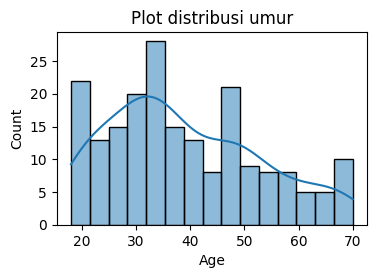

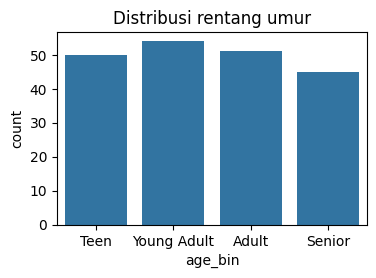

In [200]:
plt.figure(figsize = (4,2.5))
sns.histplot(x='Age',data = df,kde=True,bins=15)
plt.title("Plot distribusi umur")

df['age_bin'] = pd.qcut(df['Age'],q=4,labels =['Teen','Young Adult','Adult','Senior'])
plt.figure(figsize = (4,2.5))
sns.countplot(x='age_bin',data = df)
plt.title("Distribusi rentang umur")
plt.show()

Usia pelanggan mall cukup tersebar merata, dimana dominan young adult. Terdapat juga Senior dimana proporsi lebih sedikit

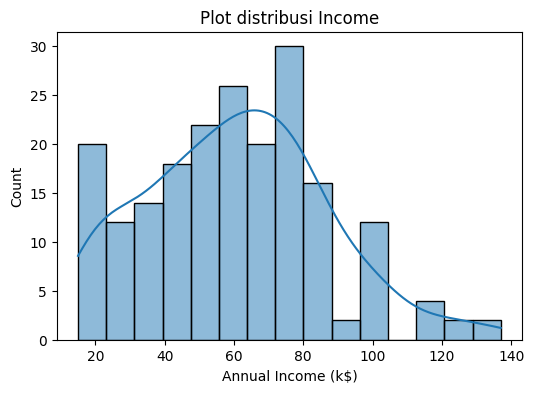

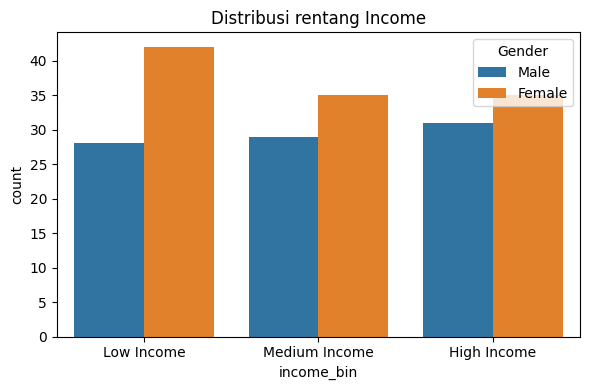

In [201]:
plt.figure(figsize = (6,4))
sns.histplot(x='Annual Income (k$)',data = df,kde=True,bins=15)
plt.title("Plot distribusi Income")

df['income_bin'] = pd.qcut(df['Annual Income (k$)'],q=3,labels =['Low Income','Medium Income','High Income'])
plt.figure(figsize = (6,4))
sns.countplot(x='income_bin',data = df,hue='Gender')
plt.title("Distribusi rentang Income")
plt.tight_layout()
plt.show()

- Plot distribusi income merata
- Proporsi income juga merata, dimana terdapat jumlah high income yang terlihat, bisa jadi calon segmen eksklusif
- Untuk tiap rentang income, perempuan memiliki income yang lebih tinggi

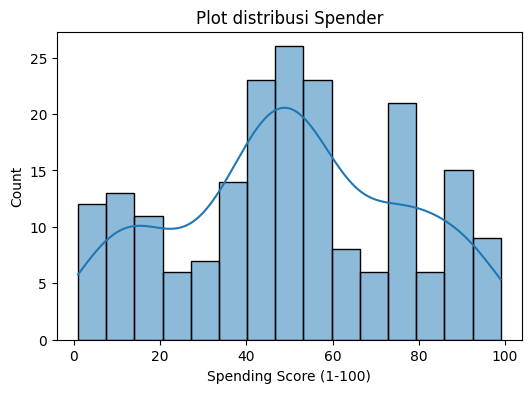

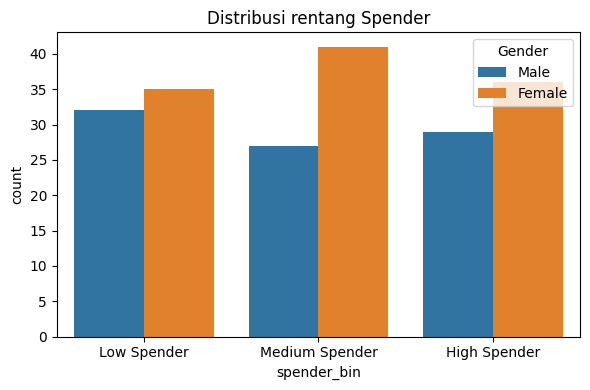

In [202]:
plt.figure(figsize = (6,4))
sns.histplot(x='Spending Score (1-100)',data = df,kde=True,bins=15)
plt.title("Plot distribusi Spender")

df['spender_bin'] = pd.qcut(df['Spending Score (1-100)'],q=3,labels =['Low Spender','Medium Spender','High Spender'])
plt.figure(figsize = (6,4))
sns.countplot(x='spender_bin',data = df,hue='Gender')
plt.title("Distribusi rentang Spender")
plt.tight_layout()
plt.show()

- Plot distribusi spending score cukup merata
- Proporsi spending score juga merata, dimana terdapat jumlah high spender yang terlihat, bisa jadi calon segmen eksklusif juga
- Untuk tiap rentang spending score, perempuan memiliki spending score yang lebih tinggi

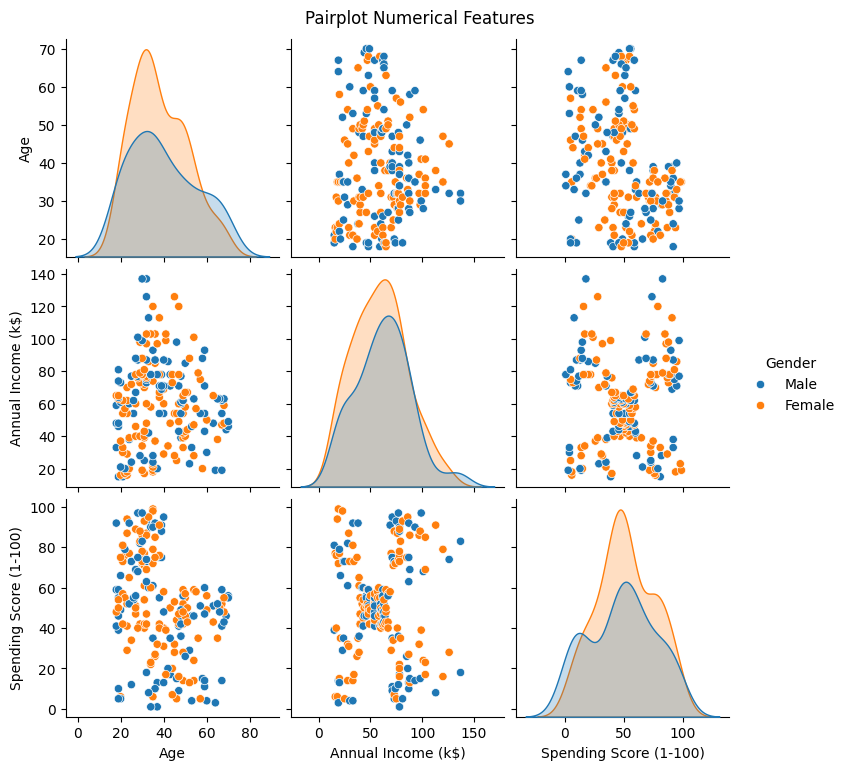

In [203]:
sns.pairplot(df,hue='Gender',diag_kind='kde')
plt.suptitle("Pairplot Numerical Features", y=1.02)
plt.show()

Setelah dilakukan crosstab fitur, terdapat pola menarik di Annual Income vs Spending Score, dimana cukup terlihat segmen yang jelas. Ini bisa menjadi petunjuk kuat untuk segmentasi

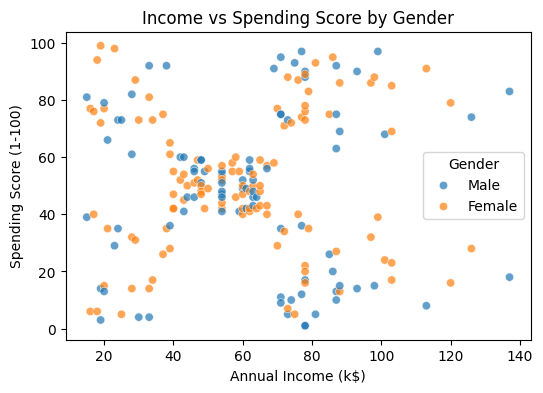

In [204]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df, alpha=0.7)
plt.title("Income vs Spending Score by Gender")
plt.show()

Terdapat pola yang cukup terlihat, dimana terdapat outlier juga baik dari High Income ataupun HIgh Spending 

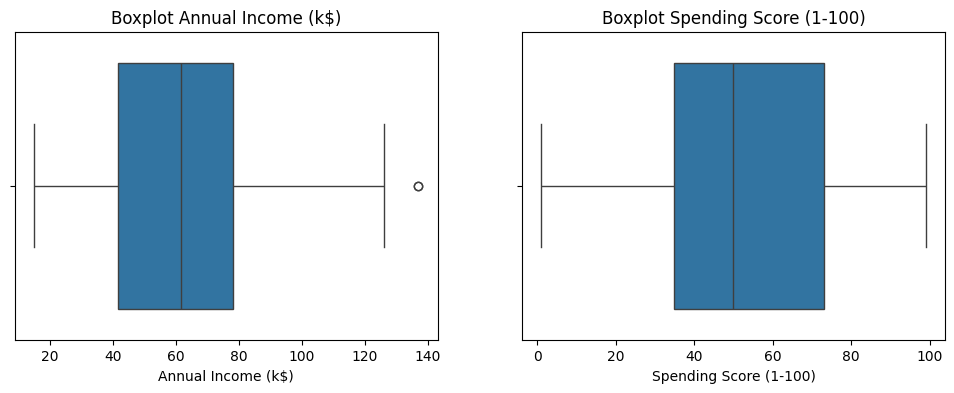

In [205]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x=df['Annual Income (k$)'])
plt.title('Boxplot Annual Income (k$)')

plt.subplot(1,2,2)
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Boxplot Spending Score (1-100)')

plt.show()

In [206]:
income_z_score = np.abs(stats.zscore(df['Annual Income (k$)']))
spending_z_score = np.abs(stats.zscore(df['Spending Score (1-100)']))

outliers = df[(income_z_score > 3) | (spending_z_score > 3)]
print(outliers)

Empty DataFrame
Columns: [Gender, Age, Annual Income (k$), Spending Score (1-100), age_bin, income_bin, spender_bin]
Index: []


terlihat bahwa tidak ditemukan outlier berdasarkan z-score, dan juga dari boxplot, ada satu outlier yang mana tetap dibiarkan dimana akan dianggap sebagai pelanggan VIP 

Selanjutnya Feature Interaction untuk memperkaya fitur

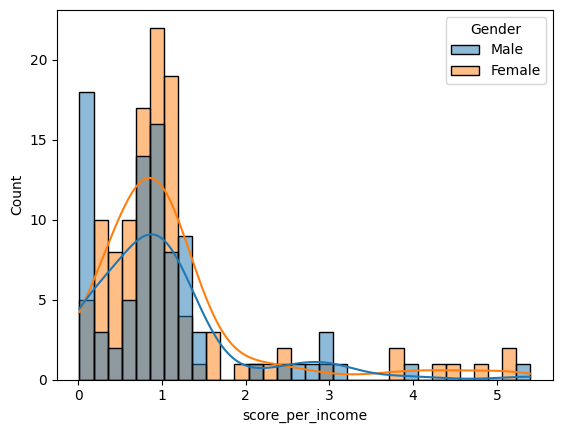

In [207]:
df['score_per_income'] = df['Spending Score (1-100)']/df['Annual Income (k$)']
sns.histplot(x = 'score_per_income',data=df,hue='Gender',kde=True)
plt.show()

In [208]:
df['age_income'] = df['Age']*df['Annual Income (k$)']

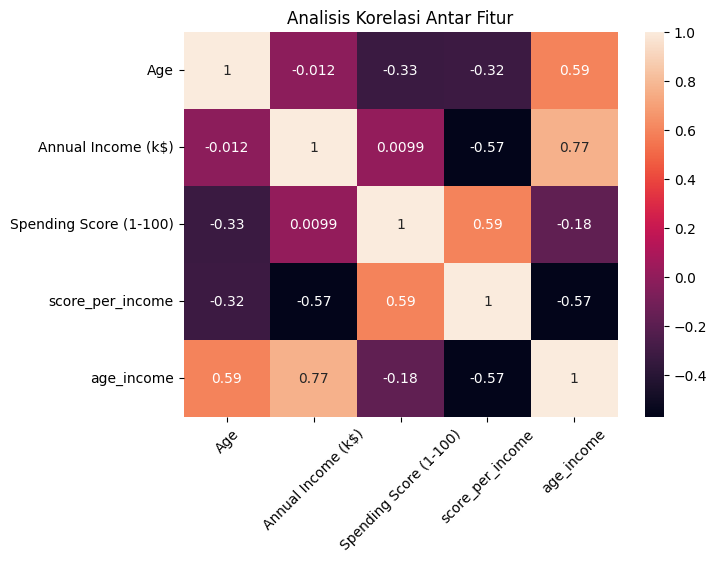

In [209]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title('Analisis Korelasi Antar Fitur')
plt.xticks(rotation=45)
plt.show()

Kesimpulan:
- Dataset cukup seimbang berdasarkan Gender, walau lebih banyak perempuan
- Terdapat segmen potensial berdasarkan Income vs Spending score, sehingga bisa dibuat hipotesis cluster:
    - Low Income, High Spender
    - Low Income, Low Spender
    - High Income, Low Spender
    - High Income, High Spender
- Baik dari income, maupun spending score, pelanggan perempuan lebih tinggi. Dari sini bisa dibuat strategi seperti promo atau penawaran spesifik untuk pelanggan perempuan. Juga bisa dengan membaut penawaran atau promo spesifik untuk meningkatkan spending score dari pelanggan laki-laki
- Dari crosstab juga bisa dilihat:
    - umur pelanggan Perempuan cenderung lebih tua dibanding pelanggan laki-laki
    - spending score perempuan cenderung lebih tinggi dibanding laki-laki dimana berarti perempuan cenderung lebih sering berbelanja dibandingkan laki-laki

In [210]:
df.to_csv("data/clean.csv",index=False)